In [2]:
import numpy as np
from random import randint
from sklearn.utils import shuffle

In [3]:
from sklearn.preprocessing import MinMaxScaler

In [4]:
train_labels=[]
train_samples=[]

# Training Data

In [5]:
for i in range(50):
    # 5% younger individuals who experinced side effect 
    random_younger=randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(1)

    # 5% older individuals who did not experinced side effect 
    random_older=randint(65,100)
    train_samples.append(random_older)
    train_labels.append(0)

for i in range(1000):
    # 95% younger individuals who did not experinced side effect
    random_younger=randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0)

    
    # 5% older individuals who experinced side effect
    random_older=randint(65,100)
    train_samples.append(random_older)
    train_labels.append(1)
    
    

In [6]:
train_labels.count(1)

1050

In [7]:
train_labels.count(0)

1050

In [10]:
train_samples.shape

(2100,)

convert list to array for input


In [9]:
train_labels=np.array(train_labels)
train_samples=np.array(train_samples)

In [11]:
train_labels, train_samples=shuffle(train_labels,train_samples)

In [12]:
scaler=MinMaxScaler(feature_range=(0,1)) #normaliza data so learning becomes more efficient
scaler_train_samples=scaler.fit_transform(train_samples.reshape(-1,1)) #fit_transform function does not 
# accept 1-d data therefore change shape
scaler_train_samples

array([[0.98850575],
       [1.        ],
       [0.90804598],
       ...,
       [0.90804598],
       [0.2183908 ],
       [0.95402299]])

In [13]:
scaler_train_samples.shape

(2100, 1)

# Sequential Model

Feed-forward neural network with one input and output.

In [1]:
import tensorflow as tf
from tensorflow import keras

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Dense

In [16]:
from tensorflow.keras.optimizers import Adam

In [17]:
from tensorflow.keras.metrics import categorical_crossentropy

no gpu is bein used

In [19]:
physical_devices=tf.config.experimental.list_physical_devices("GPU")
physical_devices

[]

In [24]:
# input data here makes the input layer itself. Do not specify input layer
model=Sequential([
    Dense(units=128,input_shape=(1,),activation="relu"), # first hidden layer
    Dense(units=32,activation="relu"),
    Dense(units=2,activation="softmax")
])

In [27]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 128)                 │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,450 (17.38 KB)

 Trainable params: 4,450 (17.38 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
model.compile(optimizer=Adam(learning_rate=0.001), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Did not use validation split

m1 stores history returned object 

In [34]:
m1=model.fit(x=scaler_train_samples,y=train_labels,batch_size=10,epochs=10, shuffle=True, verbose=2)

Epoch 1/10
210/210 - 0s - 2ms/step - accuracy: 0.9467 - loss: 0.2160
Epoch 2/10
210/210 - 0s - 2ms/step - accuracy: 0.9467 - loss: 0.2148
Epoch 3/10
210/210 - 0s - 2ms/step - accuracy: 0.9443 - loss: 0.2152
Epoch 4/10
210/210 - 0s - 2ms/step - accuracy: 0.9448 - loss: 0.2126
Epoch 5/10
210/210 - 0s - 2ms/step - accuracy: 0.9448 - loss: 0.2140
Epoch 6/10
210/210 - 0s - 2ms/step - accuracy: 0.9452 - loss: 0.2127
Epoch 7/10
210/210 - 0s - 2ms/step - accuracy: 0.9405 - loss: 0.2143
Epoch 8/10
210/210 - 0s - 2ms/step - accuracy: 0.9414 - loss: 0.2148
Epoch 9/10
210/210 - 0s - 2ms/step - accuracy: 0.9457 - loss: 0.2092
Epoch 10/10
210/210 - 0s - 2ms/step - accuracy: 0.9390 - loss: 0.2143


# Use of validatin Split - (Occurs before shuffle) so no use of shuffle=True.
# Either shuffle before validation split

In [37]:
m1=model.fit(x=scaler_train_samples,y=train_labels,validation_split=0.2, batch_size=10,epochs=10, verbose=2)

Epoch 1/10
168/168 - 1s - 4ms/step - accuracy: 0.9458 - loss: 0.2104 - val_accuracy: 0.9429 - val_loss: 0.1967
Epoch 2/10
168/168 - 0s - 3ms/step - accuracy: 0.9464 - loss: 0.2083 - val_accuracy: 0.9214 - val_loss: 0.2277
Epoch 3/10
168/168 - 0s - 3ms/step - accuracy: 0.9417 - loss: 0.2118 - val_accuracy: 0.9571 - val_loss: 0.1960
Epoch 4/10
168/168 - 0s - 3ms/step - accuracy: 0.9417 - loss: 0.2111 - val_accuracy: 0.9429 - val_loss: 0.1990
Epoch 5/10
168/168 - 0s - 3ms/step - accuracy: 0.9452 - loss: 0.2104 - val_accuracy: 0.9571 - val_loss: 0.1969
Epoch 6/10
168/168 - 0s - 3ms/step - accuracy: 0.9470 - loss: 0.2082 - val_accuracy: 0.9571 - val_loss: 0.2003
Epoch 7/10
168/168 - 0s - 3ms/step - accuracy: 0.9440 - loss: 0.2093 - val_accuracy: 0.9429 - val_loss: 0.1953
Epoch 8/10
168/168 - 0s - 3ms/step - accuracy: 0.9482 - loss: 0.2080 - val_accuracy: 0.9429 - val_loss: 0.2029
Epoch 9/10
168/168 - 0s - 3ms/step - accuracy: 0.9429 - loss: 0.2087 - val_accuracy: 0.9571 - val_loss: 0.1925
E

In [39]:
test_labels=[]
test_samples=[]
for i in range(50):
    # 5% younger individuals who experinced side effect 
    random_younger=randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(1)

    # 5% older individuals who did not experinced side effect 
    random_older=randint(65,100)
    test_samples.append(random_older)
    test_labels.append(0)

for i in range(1000):
    # 95% younger individuals who did not experinced side effect
    random_younger=randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(0)

    
    # 5% older individuals who experinced side effect
    random_older=randint(65,100)
    test_samples.append(random_older)
    test_labels.append(1)
    
    

In [43]:
test_labels=np.array(train_labels)
test_samples=np.array(train_samples)
test_labels,test_samples=shuffle(test_labels, test_samples)
scaled_test_samples=scaler.fit_transform(test_samples.reshape(-1,1))

In [46]:
predictions=model.predict(x=scaled_test_samples,batch_size=10,verbose=2)
predictions

210/210 - 0s - 1ms/step


array([[0.04964744, 0.95035255],
       [0.9488182 , 0.05118185],
       [0.9477182 , 0.05228183],
       ...,
       [0.04818748, 0.9518125 ],
       [0.05207082, 0.94792914],
       [0.05454628, 0.9454537 ]], dtype=float32)

# 0-> no 1>-yes

In [49]:
rounded_predictions=np.argmax(predictions,axis=1)
rounded_predictions

array([1, 0, 0, ..., 1, 1, 1], dtype=int64)

In [50]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [52]:
cm=confusion_matrix(y_true=test_labels, y_pred=rounded_predictions)

In [54]:
print(str(cm))

[[1000   50]
 [  78  972]]


# PLot confusion matrix

In [56]:
def plot_confusion_matrix(cm,classes,normalize=False,title="Confusion Matrix",cmap=plt.cm.Blues):
    plt.imshow(cm,interpolation="nearest",cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks=np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)

    if normalize:
        cm=cm.astype("float")//cm.sum(axis=1)[:,np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix without Normalization")
    print(cm)

    thresh=cm.max()/2
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j],
                 horizontalalignment="center",
                 color="white" if cm[i,j]>thresh else "black")
    plt.tight_layout()
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
        

Confusion matrix without Normalization
[[1000   50]
 [  78  972]]


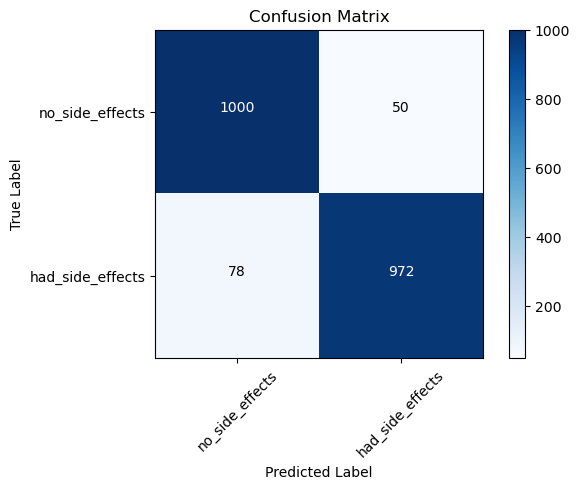

In [57]:
cm_plot_labels=["no_side_effects","had_side_effects"]
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title="Confusion Matrix")

# Save and load a model 

# 1. model.save

# Save all the three architeccture, weights and optimizer state

In [58]:
import os.path

In [59]:
if os.path.isfile(r"C:\Users\smart\Downloads\GENAI\trial_model1.h5") is False:
    model.save(r"C:\Users\smart\Downloads\GENAI\trial_model1.h5")

In [60]:
from tensorflow.keras.models  import load_model
new_model=load_model(r"C:\Users\smart\Downloads\GENAI\trial_model1.h5")

In [61]:
new_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 128)                 │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,452 (17.39 KB)

 Trainable params: 4,450 (17.38 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [8]:
import tensorflow as tf

# Check if CUDA is available
if tf.config.list_physical_devices('GPU'):
    print("CUDA is available! TensorFlow can access the GPU.")
    # Create a tensor and run a simple operation on the GPU
    with tf.device('/GPU:0'):  # Use the first GPU
        tensor = tf.random.normal([3, 3])
        print("Tensor on GPU:")
        print(tensor)
else:
    print("CUDA is not available. Running on CPU.")


CUDA is not available. Running on CPU.


In [2]:
nvidia -smi


NameError: name 'nvidia' is not defined

In [3]:
pip list

Package                           Version
--------------------------------- ------------------
absl-py                           2.1.0
aiobotocore                       2.12.3
aiohappyeyeballs                  2.4.0
aiohttp                           3.10.5
aioitertools                      0.7.1
aiosignal                         1.2.0
alabaster                         0.7.16
alembic                           1.14.1
altair                            5.0.1
anaconda-anon-usage               0.4.4
anaconda-catalogs                 0.2.0
anaconda-client                   1.12.3
anaconda-cloud-auth               0.5.1
anaconda-navigator                2.6.3
anaconda-project                  0.11.1
annotated-types                   0.6.0
anyio                             4.2.0
appdirs                           1.4.4
archspec                          0.2.3
argon2-cffi                       21.3.0
argon2-cffi-bindings              21.2.0
arrow                             1.2.3
astroid          